In [70]:
import gzip, json, random, pandas as pd
from Preprocessing import preprocessing as prep

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2, SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [82]:
amazon_input = '../Data/reviews_Cell_Phones_and_Accessories_5.json.gz'
schema_input = '../Data/phone_reviews.csv'

In [93]:
df = pd.read_csv(schema_input)
df = df[['REVIEWBODY', 'REVIEWRATING_adj']]
df.head()
df.head()
df_1 = df[df['REVIEWRATING_adj']==1.0].values.tolist()
df_2 = df[df['REVIEWRATING_adj']==2.0].values.tolist()
df_3 = df[df['REVIEWRATING_adj']==3.0].values.tolist()
df_4 = df[df['REVIEWRATING_adj']==4.0].values.tolist()
df_5 = df[df['REVIEWRATING_adj']==5.0].values.tolist()
df1 = random.sample(df_1, 201)
df2 = random.sample(df_2, 201)
df3 = random.sample(df_3, 201)
df4 = random.sample(df_4, 201)
df5 = random.sample(df_5, 201)
df11 = pd.DataFrame(df1[1:], columns=['reviewText', 'overall'])
df12 = pd.DataFrame(df2[1:], columns=['reviewText', 'overall'])
df13 = pd.DataFrame(df3[1:], columns=['reviewText', 'overall'])
df14 = pd.DataFrame(df4[1:], columns=['reviewText', 'overall'])
df15 = pd.DataFrame(df5[1:], columns=['reviewText', 'overall'])
schema = pd.concat([df11, df12, df13, df14, df15])
schema.reset_index(drop=True)

data = []
with gzip.open(amazon_input) as f:
    for l in f:
        data.append(json.loads(l.strip()))
df = pd.DataFrame.from_dict(data)
ama_df = df[['reviewText', 'overall']]

df.head()
df_1 = ama_df[ama_df['overall']==1.0].values.tolist()
df_2 = ama_df[ama_df['overall']==2.0].values.tolist()
df_3 = ama_df[ama_df['overall']==3.0].values.tolist()
df_4 = ama_df[ama_df['overall']==4.0].values.tolist()
df_5 = ama_df[ama_df['overall']==5.0].values.tolist()
df1 = random.sample(df_1, 201)
df2 = random.sample(df_2, 201)
df3 = random.sample(df_3, 201)
df4 = random.sample(df_4, 201)
df5 = random.sample(df_5, 201)
df11 = pd.DataFrame(df1[1:], columns=['reviewText', 'overall'])
df12 = pd.DataFrame(df2[1:], columns=['reviewText', 'overall'])
df13 = pd.DataFrame(df3[1:], columns=['reviewText', 'overall'])
df14 = pd.DataFrame(df4[1:], columns=['reviewText', 'overall'])
df15 = pd.DataFrame(df5[1:], columns=['reviewText', 'overall'])
amazon = pd.concat([df11, df12, df13, df14, df15])
amazon.reset_index(drop=True)

all = pd.concat([schema, amazon], ignore_index=True)
text = all['reviewText']
target = all['overall']

clean_text = pd.Series(prep.preprocess_reviews(text))

In [49]:
df_schema = pd.read_csv(schema_input)
text = df_schema['REVIEWBODY']
target = df_schema['REVIEWRATING_adj']
clean_text = pd.Series(prep.preprocess_reviews(text))

Feature size of TF-IDF:  26598
Training and prediction done
Training target statistics: Counter({4.0: 368, 3.0: 367, 2.0: 360, 5.0: 354, 1.0: 351})
Testing target statistics: Counter({1.0: 49, 5.0: 46, 2.0: 40, 3.0: 33, 4.0: 32})
train: 0.9/ test: 0.1
Accuracy:0.445
Precision:0.4393499381734676
F1:0.43455515674883943
col_0    1.0  2.0  3.0  4.0  5.0
overall                         
1.0       20   18    8    2    1
2.0        6   20    6    5    3
3.0        6    7   12    5    3
4.0        2    1    6   11   12
5.0        3    5    2   10   26
Feature size of TF-IDF:  23643
Training and prediction done
Training target statistics: Counter({3.0: 334, 4.0: 331, 2.0: 320, 1.0: 311, 5.0: 304})
Testing target statistics: Counter({5.0: 96, 1.0: 89, 2.0: 80, 4.0: 69, 3.0: 66})
train: 0.8/ test: 0.2
Accuracy:0.435
Precision:0.45821847507331376
F1:0.4330841308814296
col_0    1.0  2.0  3.0  4.0  5.0
overall                         
1.0       33   26   18    7    5
2.0       12   43   15    7    3

c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\d064966\appdata\local\continuum\anaconda3\envs\masterthesis\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative so

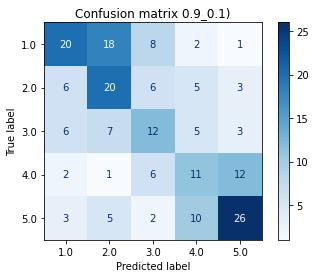

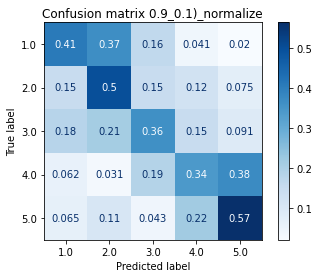

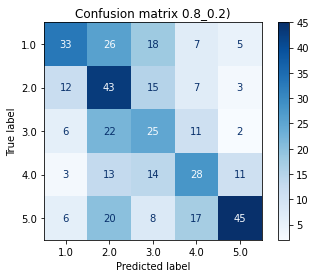

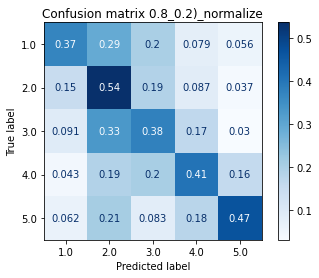

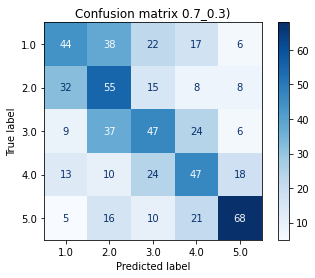

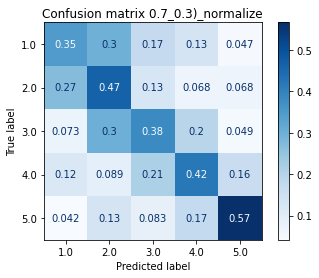

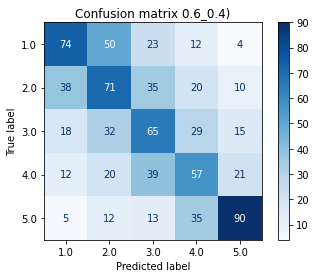

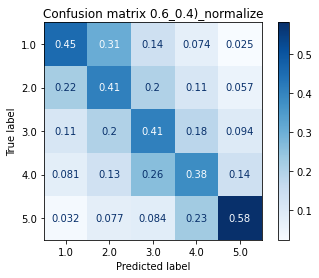

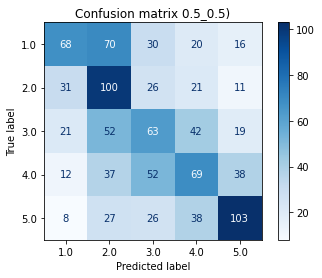

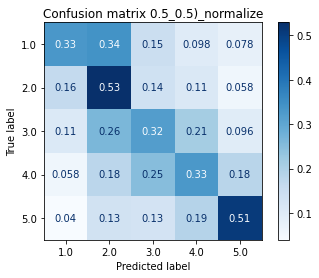

In [89]:
# clf = MultinomialNB()
clf = LogisticRegression(C=1.0, dual=False, fit_intercept=True, random_state=0, solver='lbfgs', intercept_scaling=1, max_iter=100, multi_class='multinomial')

list_test = [0.1, 0.2, 0.3, 0.4, 0.5]
for i in list_test:
    # Split dataset into training set and test set
    test_size = i
    train_size = 1 - i
    X_train, X_test, y_train, y_test = train_test_split(clean_text, target, test_size=i,random_state=None)

    # vectorizer = TfidfVectorizer(min_df=2 ,max_df=0.8, use_idf=True,sublinear_tf=True, ngram_range=(1,3))
    vectorizer = CountVectorizer(min_df=2 ,max_df=0.8, ngram_range=(1,3))


    train_vectorized = vectorizer.fit_transform(X_train)
    vocab = vectorizer.get_feature_names()

    print ("Feature size of TF-IDF: ", len(vocab))
    test_vectorized = vectorizer.transform(X_test)

    # vectorizer_chi2 = SelectKBest(chi2,k=3000)
    vectorizer_fs = SelectKBest(score_func=f_regression, k=2500)

    chi_train_vectorized = vectorizer_fs.fit_transform(train_vectorized,y_train)
    chi_test_vectorized = vectorizer_fs.transform(test_vectorized)

    # Train the model using the training sets
    # nb.fit(X_train, y_train)
    clf.fit(chi_train_vectorized, y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(chi_test_vectorized)
    print("Training and prediction done")
    print('Training target statistics: {}'.format(Counter(y_train), sorted(y_train)))
    print('Testing target statistics: {}'.format(Counter(y_test), sorted(y_test)))

    # Model Accuracy, how often is the classifier correct?
    print("train: " + str(train_size) + "/ test: " + str(test_size))
    accuracy = str(metrics.accuracy_score(y_test, y_pred))
    precision = str(metrics.precision_score(y_test, y_pred, average="macro"))
    f1 = str(metrics.f1_score(y_test, y_pred, average="macro"))
    print("Accuracy:" + accuracy)
    print("Precision:" + precision)
    print("F1:" + f1)
    print(pd.crosstab(y_test, y_pred))

    # Visualization of Confusion Matrix and saving
    plt.rcParams['figure.facecolor'] = 'white'
    title = f"Confusion matrix {train_size}_{test_size})"
    disp = plot_confusion_matrix(clf, chi_test_vectorized, y_test,
                                 display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)
    plt.show()

    title_norm = title + "_normalize"
    disp_norm = plot_confusion_matrix(clf, chi_test_vectorized, y_test,
                                 display_labels=[1.0, 2.0, 3.0, 4.0, 5.0],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
    disp_norm.ax_.set_title(title_norm)
    plt.show()


In [90]:
########### Error Analysis ##############################

import numpy as np
np.asarray(vectorizer.get_feature_names())[vectorizer_fs.get_support()]
top_ranked_features = sorted(enumerate(vectorizer_fs.scores_),key=lambda x:x[1])[:10]
top_ranked_features_indices = list(map(list,zip(*top_ranked_features)))[0]
for feature_pvalue in zip(np.asarray(vectorizer.get_feature_names())[top_ranked_features_indices], vectorizer_fs.pvalues_[top_ranked_features_indices]):
    print(feature_pvalue)

('second', 0.9968650143670345)
('fine', 0.9968547382912016)
('especi', 0.9943791451890868)
('ar', 0.9908707687537567)
('rather', 0.9897226549527465)
('display back', 0.9896880064510771)
('nthe main', 0.9896880064510771)
('yotaphon', 0.9896880064510771)
('alcatel', 0.9892431735722831)
('chees', 0.9892431735722831)


In [ ]:
predictions = clf.predict(chi_test_vectorized)
for input, prediction, label in zip(chi_test_vectorized, predictions, y_test):
  if prediction != label:
    print(input, 'has been classified as ', prediction, 'and should be ', label)

In [96]:
text[0]

'"It has been heard that Mobilink; one of the leading telecommunication brands of Pakistan is now launching its 3G phones with extremely low price with awesome specs. Although the date of launch has not been announced yet, but it is expected to be within few days. According to some hints&hellip;"@en-US'

In [97]:
clean_text[0]

'ha heard mobilink one lead telecommun brand pakistan launch g phone extrem low price awesom spec although date launch ha not announc yet but expect within day accord hint en us'